In [1]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
n_eu = pypsa.Network("../../results/modelenergy/ammonia-de/6627cbeac8b58c2e9a5abd9bb456ab1b.nc")

INFO:pypsa.io:Imported network 6627cbeac8b58c2e9a5abd9bb456ab1b.nc has buses, generators, links, loads, stores


In [3]:
n_eu.generators

,bus,p_nom_extendable,p_nom_max,carrier,marginal_cost,capital_cost,p_nom_opt,control,type,p_nom,...,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight
Generator,,,,,,,,,,,,,,,,,,,,,
solar,electricity,True,10000000.0,solar,0.099998,31877.089844,1392.772705,PQ,,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0
wind,electricity,True,10000000.0,wind,0.199997,88321.562500,237.940643,PQ,,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0


In [4]:
n_eu.buses

,carrier,v_nom,type,x,y,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
electricity,electricity,1.0,,0.0,0.0,,1.0,0.0,inf,PQ,,
battery,AC,1.0,,0.0,0.0,,1.0,0.0,inf,PQ,,
hydrogen,hydrogen,1.0,,0.0,0.0,,1.0,0.0,inf,PQ,,
water,water,1.0,,0.0,0.0,,1.0,0.0,inf,PQ,,
compressed hydrogen,compressed hydrogen,1.0,,0.0,0.0,,1.0,0.0,inf,PQ,,
destination,ammonia,1.0,,0.0,0.0,,1.0,0.0,inf,PQ,,
ammonia,ammonia,1.0,,0.0,0.0,,1.0,0.0,inf,PQ,,
nitrogen,nitrogen,1.0,,0.0,0.0,,1.0,0.0,inf,PQ,,


In [5]:
n_eu.links.p_nom_opt

Link
battery_power             41.826508
battery_discharge         42.688995
hydrogen_electrolyser    608.585266
desalination               0.335213
hydrogen_compressor      232.331177
hydrogen_decompressor    181.506805
air separation unit        6.309410
Haber Bosch              181.506805
ammonia shipping         116.098328
Name: p_nom_opt, dtype: float64

### JP scenario

In [6]:
n_jp = pypsa.Network("../../results/modelenergy/ammonia-jp/149f5f53c8d1afe16494dc95b6a8021c.nc")

INFO:pypsa.io:Imported network 149f5f53c8d1afe16494dc95b6a8021c.nc has buses, generators, links, loads, stores


In [7]:
n_jp.generators

,bus,p_nom_extendable,p_nom_max,carrier,marginal_cost,capital_cost,p_nom_opt,control,type,p_nom,...,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight
Generator,,,,,,,,,,,,,,,,,,,,,
solar,electricity,True,10000000.0,solar,0.099998,31877.089844,1291.314453,PQ,,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0
wind,electricity,True,10000000.0,wind,0.199997,88321.562500,220.607574,PQ,,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0


In [8]:
n_jp.loads

,bus,carrier,p_set,type,q_set,sign
Load,,,,,,
ammonia_load,destination,efuel,100.0,,0.0,-1.0


### US scenario

In [9]:
n_us = pypsa.Network("../../results/modelenergy/ammonia-us/9e668c99305a4e1511d752d73db77fbb.nc")

INFO:pypsa.io:Imported network 9e668c99305a4e1511d752d73db77fbb.nc has buses, generators, links, loads, stores


## Preliminary graphs

### Revenue

In [10]:
n_us.statistics.revenue() / n_us.statistics.dispatch().loc[:,"efuel"].values[0] * -1

component  carrier                    
Generator  solar                           47.802701
           wind                            22.621078
Load       efuel                         -140.813800
Store      ammonia storage                  1.387609
           battery storage                  2.934225
           hydrogen storage                 3.529258
Link       Haber-Bosch synthesis           23.083107
           air separation unit              2.071858
           ammonia shipping                 5.311524
           battery discharger               0.092316
           battery inverter                 0.961269
           hydrogen electrolyser           27.582031
           hydrogen storing compressor      2.979745
           seawater desalination            0.457085
dtype: float64

### Capacities

### Dispatch

In [11]:
n_us.statistics.dispatch().loc[:,"efuel"].values[0]

-876000.0

In [12]:
n = n_us

In [13]:
n.generators

,bus,p_nom_extendable,p_nom_max,carrier,marginal_cost,capital_cost,p_nom_opt,control,type,p_nom,...,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight
Generator,,,,,,,,,,,,,,,,,,,,,
solar,electricity,True,10000000.0,solar,0.099998,31877.089844,1308.657227,PQ,,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0
wind,electricity,True,10000000.0,wind,0.199997,88321.562500,223.570404,PQ,,0.0,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0


NameError: name 'load_config' is not defined

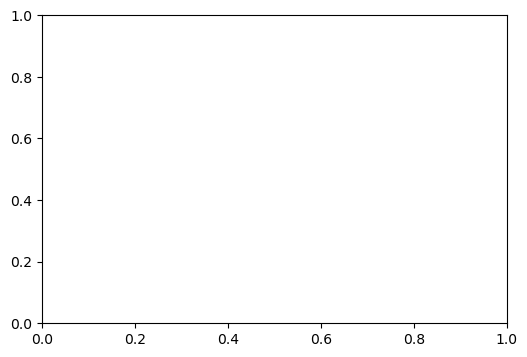

In [14]:
fig, ax = plt.subplots(figsize=(6, 4))

config = load_config(config_aldehyde)
colors = config["plot"]["tech_colors"]
plt.plot(df.index, df["cost"]/1e9, label="Total cost", color="black")
costs.plot.bar(ax=ax, stacked=True, alpha=0.8, color=colors)


#plt.xlabel("H2 rule")
plt.ylabel("Costs in B€")
plt.title(f"{h2export} TWh export, {CO2L} CO2")
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)

plt.grid(axis='y', alpha=0.5) 

fig.savefig(OUTPUT+f"abs_sin_tech_{h2export}_{opts}.pdf", bbox_inches="tight")